In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/Shareddrives/2021 팜 경진대회/2 데이터/2차용 데이터셋.csv", encoding='euc-kr')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['dong', '종사자수', '기초생활수급자 인원_비율', '65세 이상 인구 수_비율', '단장기 외국인 체류자 수_비율',
       '우체국 수_비율', '편의점 수_비율', '약국 24시간_비율', 'ATM 수_비율', '응급실 수_비율',
       '은행 수_합계_비율', '인구 합계', '면적(km^2)'],
      dtype='object')

In [2]:
y1_weight = [0.56075, 0.191, 0.08325, 0.1645] # 현금접근성 지수 가중치
y2_weight = [0.5865,0.325,0.0875] # 금융소외 지수 가중치

In [3]:
# 파생변수 칼럼 생성
import numpy as np

y1_list = [] # 현금접근성 지수
y2_list = [] # 금융소외 지수
for idx, row in df.iterrows(): 
  one = np.dot(y1_weight, row[['ATM 수_비율', '은행 수_합계_비율', '우체국 수_비율', '편의점 수_비율']])
  two = np.dot(y2_weight, row[['65세 이상 인구 수_비율', '기초생활수급자 인원_비율','단장기 외국인 체류자 수_비율']])
  y1_list.append(one)
  y2_list.append(two)
df['y1'] = y1_list
df['y2'] = y2_list

df.set_index(['dong'], inplace=True)

In [4]:
# y3 : score 변수 칼럼 생성
score_list = []
for i, row in df.iterrows():
  score = round(row['y2'] / row['y1'], 3)
  score_list.append(score)
df['y3'] = score_list
df

,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율,인구 합계,면적(km^2),y1,y2,y3
dong,,,,,,,,,,,,,,,
종로구 부암동,1521.585903,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057,9852,2.27,2.164758,0.116449,0.054
종로구 평창동,388.613303,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219,18336,8.87,0.595660,0.114394,0.192
종로구 무악동,4566.666667,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556,8334,0.36,6.004167,0.105568,0.018
종로구 가회동,23735.185185,0.016436,0.206152,0.060009,0.000000,12.962963,0.0,1.851852,0.000000,7.407407,4259,0.54,4.585648,0.131500,0.029
종로구 창신1동,19054.838710,0.079593,0.216339,0.192190,0.000000,32.258065,0.0,12.903226,0.000000,16.129032,5704,0.31,15.622581,0.169568,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구 둔촌1동,307.608696,1.917241,0.255172,0.543487,0.000000,4.347826,0.0,0.000000,0.000000,0.000000,145,0.92,0.715217,0.820317,1.147
강동구 둔촌2동,9656.122449,0.033445,0.165171,0.023938,0.000000,20.408163,0.0,7.142857,1.020408,5.102041,24847,0.98,8.336990,0.109837,0.013
강동구 암사1동,5535.294118,0.018645,0.171841,0.013078,0.000000,31.372549,0.0,1.960784,0.000000,1.960784,34916,1.02,6.634804,0.107989,0.016


In [5]:
df.to_csv('/content/drive/Shareddrives/2021 팜 경진대회/3 코드/2-2 AHP/데이터셋+파생변수.csv', encoding='euc-kr')

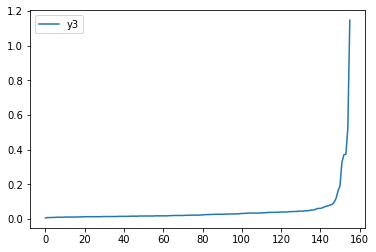

In [ ]:
# y3 분포 확인
import matplotlib.pyplot as plt

score = pd.DataFrame(score_list, columns=['y3'])
score.sort_values(by=['y3'], inplace=True)
score.reset_index(drop=True, inplace=True)
score.plot()

# 16개의 행정동을 선정하는 것이 바람직해 보임

In [ ]:
df.sort_values(by=['y3'], inplace=True, ascending=False)
selected = df.head(16)
selected

,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율,인구 합계,면적(km^2),y1,y2,y3
dong,,,,,,,,,,,,,,,
강동구 둔촌1동,307.608696,1.917241,0.255172,0.543487,0.000000,4.347826,0.00000,0.000000,0.000000,0.000000,145,0.92,0.715217,0.820317,1.147
서초구 내곡동,697.712934,0.033971,0.183296,0.027382,0.000000,0.867508,0.00000,0.157729,0.000000,0.000000,17780,12.68,0.231151,0.120939,0.523
강남구 개포1동,688.976378,0.011039,0.248912,0.039198,0.000000,1.574803,0.00000,0.000000,0.000000,0.787402,6432,1.27,0.409449,0.153004,0.374
강북구 우이동,413.618677,0.050284,0.232668,0.014997,0.000000,1.750973,0.00000,0.194553,0.000000,0.097276,20742,10.28,0.415710,0.154114,0.371
도봉구 도봉1동,661.238532,0.068282,0.268235,0.015243,0.114679,2.637615,0.00000,0.114679,0.000000,0.229358,21250,8.72,0.551548,0.180846,0.328
종로구 평창동,388.613303,0.007472,0.186518,0.029408,0.000000,1.691094,0.00000,0.450958,0.000000,0.338219,18336,8.87,0.595660,0.114394,0.192
노원구 상계3.4동,673.843416,0.093017,0.230862,0.005947,0.177936,3.736655,0.00000,0.711744,0.000000,0.000000,26479,5.62,1.028603,0.166152,0.162
관악구 삼성동,984.210526,0.080420,0.249735,0.014897,0.000000,3.759398,0.37594,1.503759,0.000000,0.000000,22656,2.66,1.461654,0.173910,0.119
강서구 방화2동,2186.895476,0.061478,0.202483,0.041859,0.000000,4.524181,0.00000,1.248050,0.000000,0.156006,23602,6.41,1.473869,0.142399,0.097


In [ ]:
selected_dong = pd.DataFrame(selected.index, columns=['dong'])
selected_dong.to_csv("최종 선정 행정동 16개.csv", encoding='euc-kr')